# Combining models

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uns
from uns import training

In [5]:
models = ('400','702', '802', '902')
# assume that all of the model have the same set
indices = np.where(training['model_'+models[0]] == 'validate')[0]
outputfiles = {model:uns.uns_files('validate','predictions',model) for model in models}

In [6]:
def plot_prob(ax, filename, mask=False):
    p = np.load(filename)
    if mask:
        ax[1].imshow(p[1,:,:], vmin=0, vmax=1, cmap=plt.cm.gray)
    else:
        ax = [ax]
    ax[0].imshow(p[0,:,:], vmin=0, vmax=1, cmap=plt.cm.inferno)
    for a in ax:
        a.axis('equal')
        a.axis('off')
        a.tick_params(which='both', axis='both',
                       bottom=False, top=False, left=False, right=False,
                       labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        a.autoscale(tight=True)

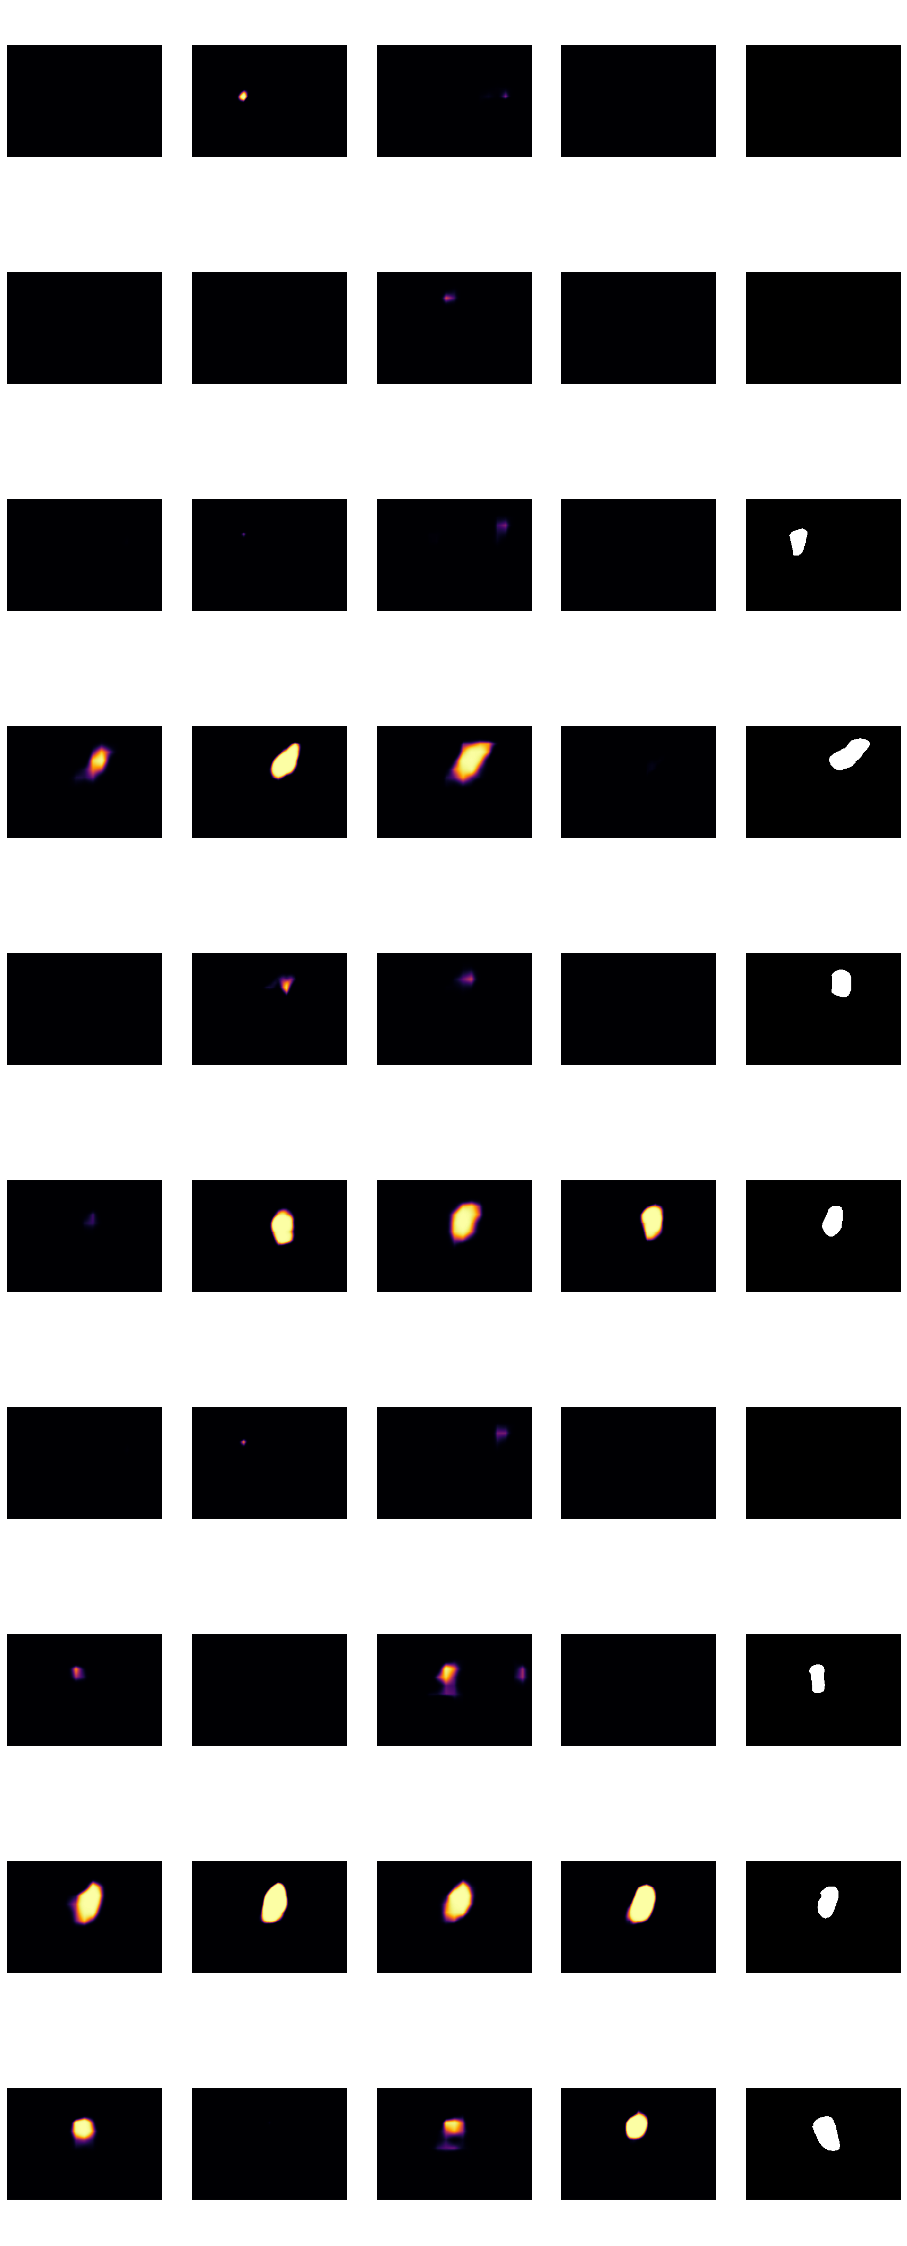

In [6]:
N = 10
fig, ax = plt.subplots(N,len(models)+1, figsize=(16,40))
subset = np.random.choice(np.arange(len(outputfiles[models[0]])), N)
for j,jdx in enumerate(subset):
    for i,m in enumerate(models):
        if i==0:
            plot_prob([ax[j,i], ax[j,-1]], outputfiles[m][jdx], mask=True)
        else:
            plot_prob(ax[j,i], outputfiles[m][jdx])
# make        

In [7]:
N = 100
subset = np.random.choice(np.arange(len(outputfiles[models[0]])), N)
for j,jdx in enumerate(subset):
    for i,m in enumerate(models):
        p = np.load(outputfiles[m][jdx])
        # calculate expected area (sum probability)
        if i == 0:
            size = np.prod(p[0].shape)
            print('{:04d}: {:5.3f}'.format(jdx, np.sum(p[1])/size), end='|')
        print('{:5.3f}'.format(np.sum(p[0])/size), end='|')
    print()

0765: 0.031|0.041|0.029|0.035|0.030|
0328: 0.035|0.015|0.016|0.031|0.026|
0173: 0.031|0.029|0.003|0.016|0.000|
0113: 0.030|0.004|0.000|0.026|0.000|
0726: 0.000|0.018|0.009|0.003|0.000|
0155: 0.025|0.004|0.000|0.024|0.000|
0125: 0.000|0.004|0.000|0.024|0.000|
0943: 0.000|0.018|0.001|0.027|0.000|
0044: 0.024|0.000|0.002|0.038|0.014|
0033: 0.000|0.000|0.000|0.006|0.000|
0895: 0.000|0.000|0.000|0.000|0.000|
0802: 0.000|0.000|0.000|0.000|0.000|
0704: 0.000|0.049|0.006|0.049|0.021|
0772: 0.000|0.043|0.035|0.043|0.035|
0141: 0.024|0.040|0.000|0.036|0.000|
0547: 0.000|0.001|0.000|0.022|0.001|
0373: 0.000|0.000|0.002|0.025|0.000|
0022: 0.038|0.011|0.000|0.032|0.000|
0153: 0.000|0.036|0.000|0.046|0.000|
0792: 0.030|0.036|0.034|0.034|0.037|
0831: 0.022|0.014|0.000|0.023|0.000|
0740: 0.031|0.036|0.034|0.034|0.037|
0633: 0.030|0.014|0.043|0.043|0.037|
0099: 0.024|0.003|0.032|0.035|0.016|
0519: 0.000|0.006|0.000|0.010|0.000|
0794: 0.025|0.041|0.036|0.034|0.036|
0267: 0.019|0.001|0.000|0.004|0.000|
0

(-0.0005, 0.1)

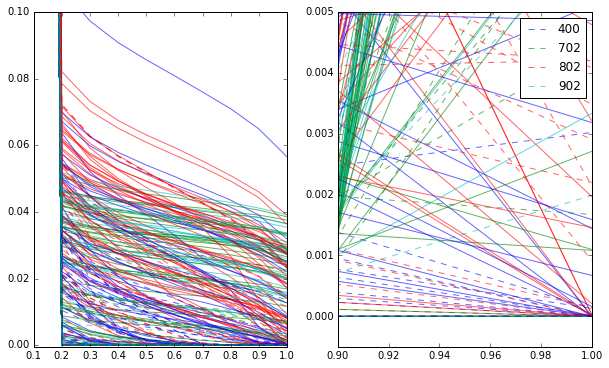

In [8]:
N = 100
fig, ax = plt.subplots(1,2, figsize=(10,6))
col = ('b','g','r','c')
subset = np.random.choice(np.arange(len(outputfiles[models[0]])), N)
leg=None
for j,jdx in enumerate(subset):
    for i,m in enumerate(models):
        p = np.load(outputfiles[m][jdx])
        hist = np.histogram(p[0],np.linspace(0,1,11))
        size = np.prod(p[0].shape)
        if np.sum(p[1]) > 0:
            ls = '-' + col[i]
        else:
            ls = '--' + col[i]
        if j==(len(subset)-1):
            leg = m
            
        ax[0].plot(hist[1][1:], np.cumsum(hist[0][::-1])[::-1]/size, ls, alpha=0.6)
        ax[1].plot(hist[1][2:], hist[0][1:]/size, ls, alpha=0.6, label=leg)
        
        #print('{:04d}: {:5.3f}'.format(jdx, np.sum(p[1])/size), end='|')
        #print('{:5.3f}'.format(np.sum(p[0])/size), end='|')
ax[1].legend() 
ax[1].set_xlim(0.9,1.0)
ax[1].set_ylim(-0.0005,0.005)

ax[0].set_ylim(-0.0005,0.1)

In [9]:
# Add new columns:
bins = np.linspace(0,1,11)
for m in models:
    for i in bins[1:]:
        columnname = 'model_{:s}_hist_{:03d}'.format(m,int(i*100))
        training[columnname] = 0
print(training.columns)

Index(['centcol', 'centrow', 'contH', 'contW', 'contour', 'contxmax',
       'contxmin', 'contymax', 'contymin', 'hasmask',
       ...
       'model_902_hist_010', 'model_902_hist_020', 'model_902_hist_030',
       'model_902_hist_040', 'model_902_hist_050', 'model_902_hist_060',
       'model_902_hist_070', 'model_902_hist_080', 'model_902_hist_090',
       'model_902_hist_100'],
      dtype='object', length=148)


In [10]:
for j,jdx in enumerate(indices):
    for i,m in enumerate(models):
        p = np.load(outputfiles[m][j])
        hist = np.histogram(p[0],np.linspace(0,1,11))
        size = np.prod(p[0].shape)
        for h,b in zip(hist[0],hist[1][1:]):
            columnname = 'model_{:s}_hist_{:03d}'.format(m,int(b*100))
            colnum = training.columns.get_loc(columnname)
            training.iloc[jdx, colnum] = h

In [13]:
training.to_msgpack('training.bin')

In [11]:
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
# list of columns:
bins = np.linspace(0,1,11)
columns = []
for m in models:
    for i in bins[1:]:
        columns.append('model_{:s}_hist_{:03d}'.format(m,int(i*100)))


In [12]:
X = training.ix[indices,columns].values/size
X.shape

(958, 40)

In [18]:
y = training.ix[indices,'hasmask'].values
clf = svm.LinearSVC()
clf.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [19]:
y_pred = clf.predict(X)
classif_rate = np.mean(y_pred == y) * 100
classif_rate

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred, labels=[True, False])
print(cm)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

# estimate dice score based on confusion matrix:
(cm_norm[0,0]*.73 + cm_norm[1,1])/2

[[281 163]
 [ 65 449]]
[[ 0.63288288  0.36711712]
 [ 0.12645914  0.87354086]]


0.66777268026781644

In [48]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Xp = RobustScaler().fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(Xp, y).transform(Xp)

/Users/chrisv/anaconda/lib/python3.4/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


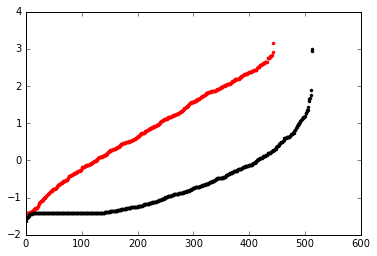

In [49]:
fig, ax = plt.subplots()
ax.plot(sorted(X_r2[y]),'.r')
ax.plot(sorted(X_r2[~y]),'.k')

In [38]:
lda.means_

array([[ 0.04400222, -0.26938399, -0.21953032, -0.09887246,  0.13002445,
         0.25680934,  0.24451908,  0.21974348,  0.17807175,  0.31773235,
        -0.2137178 ,  0.24600614,  0.33427547,  0.31815614,  0.31311945,
         0.30774338,  0.29741776,  0.27080551,  0.2620043 ,  0.22296769,
         0.3244998 , -0.37707684, -0.25484896, -0.2285841 , -0.23950102,
        -0.24135578, -0.26552494, -0.26586609, -0.22747768,  0.12652309,
        -0.19905122,  0.22159659,  0.21516969,  0.20126124,  0.19317922,
         0.19626378,  0.19129401,  0.18777793,  0.18980108,  0.58619868],
       [-0.57216323,  0.15755839,  0.25357346,  0.41710649,  0.66890854,
         0.82193959,  0.81431515,  0.79131131,  0.77947823,  2.33914309,
        -0.78459717,  0.58937596,  0.70689908,  0.68232345,  0.71013938,
         0.68003074,  0.70020475,  0.6701627 ,  0.67466935,  1.15158607,
        -0.18797186,  0.08387786,  0.09582388,  0.10485926,  0.1014974 ,
         0.12466376,  0.13164061,  0.17323358,  0.

## why are we missing masks?

In [ ]:
#predicted area model_???_hist_100 vs mask area
#mask properties
# Classifier? regression?

